In [22]:
import camelot
import pandas as pd

# Updated Process

## 1. Create empty dataframe with proper column names

In [23]:
# This is where data will be added after cleaning. The final dataframe for export

In [24]:
df = pd.DataFrame(columns = [
    "Common_name",
    "Species",
    "Redlist_category", 
    "Bestand", 
    "Trend_lang", 
    "Trend_kurz",
    "Riskio"
])
df

,Common_name,Species,Redlist_category,Bestand,Trend_lang,Trend_kurz,Riskio


In [25]:
df.shape

(0, 7)

## 2. Setup mechanism to store accuracy report : QA step

In [26]:
accuracy = []

## 3. Dictionary of dataframes on the go

In [27]:
# Dictionary to collect dataframes created from each table
d = {}

## 4. Adding the list of pages to be parsed

In [28]:
pages = []
i = 23
while i < 24:
    pages.append(i)
    i = i + 1
print(pages)

[23]


## 5. Parsing through the pages

In [29]:
for i in pages:
    # print page number
    print (i)
    # create dataframe with page number
    d[i] = pd.DataFrame()
    #read the page
    tables = camelot.read_pdf('broschuere_fische_a.pdf', 
                              pages= str(i), 
                              flavor='stream', edge_tol=1000, row_tol=10)
    #tables = camelot.read_pdf('18_netzfl_print.pdf', pages= str(i), flavor='lattice')
    # add the accuracy report
    accuracy.append(tables[0].parsing_report)
    # assign the first table to a dataframe
    d[i] = tables[0].df
    print(d[i].shape)
# Print Done once all pages are parsed
print ("Done")

23
(48, 8)
Done


In [30]:
d[23]

,0,1,2,3,4,5,6,7
0,Checkliste der Fischarten Berlins,,,,,,,
1,,Tabelle 2: Gesamtliste der in Berliner Gewässe...,,,,,,
2,Name,,Rote Liste,,,Kriterien,,
3,,,Kategorie,Bestand \naktuell,Trend lang,,Trend kurz,Risiko
4,Aal,Anguilla anguilla,♦,nb,,,,
5,Aland,Leuciscus idus,*,mh,<,,^,=
6,Bachneunauge,Lampetra planeri,0,ex,,,,
7,Bachsaibling,Salvelinus fontinalis,♦ N,nb,,,,
8,Barbe,Barbus barbus,0,ex,,,,
9,Barsch,Perca fluviatilis,*,sh,>,,=,=


In [31]:
# Check accuracy reports for the process
accuracy

[{'accuracy': 99.38, 'whitespace': 30.47, 'order': 1, 'page': 23}]

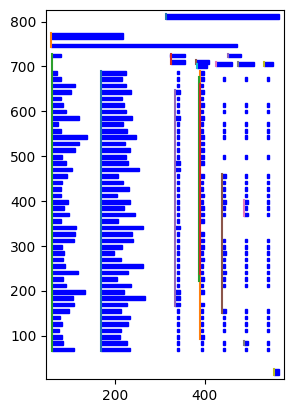

In [32]:
camelot.plot(tables[0], kind='textedge').savefig('demo.png', bbox_inches='tight')

# Data cleanup steps

In [33]:
# Check whether all dataframes are of the same size
for key in d:
    print(key)
    print(d[key].shape)

23
(48, 8)


In [34]:
d[23].head()

,0,1,2,3,4,5,6,7
0,Checkliste der Fischarten Berlins,,,,,,,
1,,Tabelle 2: Gesamtliste der in Berliner Gewässe...,,,,,,
2,Name,,Rote Liste,,,Kriterien,,
3,,,Kategorie,Bestand \naktuell,Trend lang,,Trend kurz,Risiko
4,Aal,Anguilla anguilla,♦,nb,,,,


In [35]:
d[23] = d[23].drop([5], axis=1)
 #   : Drop the 5th column in place

In [36]:
d[23].shape

(48, 7)

In [37]:
# Removing empty dataframes
# del d[64]
# del d[74]

In [38]:
# Creates a sorted dictionary (sorted by key)
from collections import OrderedDict
d2 = OrderedDict(sorted(d.items()))

In [39]:
# Check whether the dictionary is sorted
for key in d2:
    print(key)

23


In [40]:
# Rename all the dataframes in the sorted dictionary
for key in d2:
    print(key)
    d2[key].columns = [ "Common_name",
    "Species",
    "Redlist_category", 
    "Bestand", 
    "Trend_lang", 
    "Trend_kurz",
    "Riskio"]
print("Rename completed for concat")

23
Rename completed for concat


In [41]:
# Concatanate all the non-empty dataframes in the sorted dictionary into the empty df
for key in d2:
    df = pd.concat([df, d2[key]], axis = 0)
df

,Common_name,Species,Redlist_category,Bestand,Trend_lang,Trend_kurz,Riskio
0,Checkliste der Fischarten Berlins,,,,,,
1,,Tabelle 2: Gesamtliste der in Berliner Gewässe...,,,,,
2,Name,,Rote Liste,,,,
3,,,Kategorie,Bestand \naktuell,Trend lang,Trend kurz,Risiko
4,Aal,Anguilla anguilla,♦,nb,,,
5,Aland,Leuciscus idus,*,mh,<,^,=
6,Bachneunauge,Lampetra planeri,0,ex,,,
7,Bachsaibling,Salvelinus fontinalis,♦ N,nb,,,
8,Barbe,Barbus barbus,0,ex,,,
9,Barsch,Perca fluviatilis,*,sh,>,=,=


In [42]:
df3 = df.loc[df["Bestand"] == "ex"]
df3.reset_index(inplace = True)
df3 = df3.drop(['index'], axis=1)
df3.head()

,Common_name,Species,Redlist_category,Bestand,Trend_lang,Trend_kurz,Riskio
0,Bachneunauge,Lampetra planeri,0,ex,,,
1,Barbe,Barbus barbus,0,ex,,,
2,Europäischer\tStör,Acipenser sturio,0,ex,,,
3,Flussneunauge,Lampetra fluviatilis,0,ex,,,
4,Lachs,Salmo salar,0,ex,,,


In [43]:
df3.describe()

,Common_name,Species,Redlist_category,Bestand,Trend_lang,Trend_kurz,Riskio
count,7,7,7,7,7,7,7
unique,7,7,1,1,1,1,1
top,Bachneunauge,Lampetra planeri,0,ex,,,
freq,1,1,7,7,7,7,7


In [44]:
# Updated export location
# export the dataframe as CSV
df3.to_csv('../../Transformation/Raw_csv/Pisces.csv', 
          index = False
         )